<a href="https://colab.research.google.com/github/ROstapch/DBscanTest/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import numpy as np
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt

Estimated number of clusters: 5
Estimated number of noise points: 57
Homogeneity: 0.836
Completeness: 0.756
V-measure: 0.794
Adjusted Rand Index: 0.785
Adjusted Mutual Information: 0.791
Silhouette Coefficient: 0.496


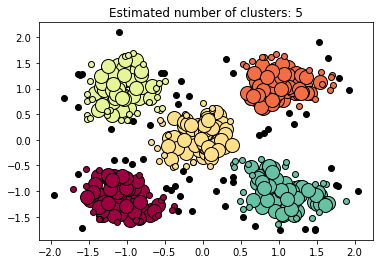

In [192]:
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]]
X, labels_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.3,
                            random_state=np.random.randint(0, 1000))

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.25, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

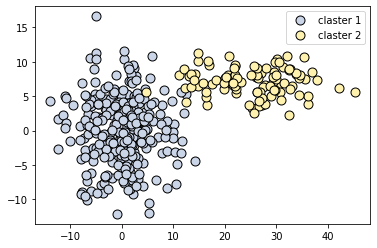

Amount of clusters:  2
Amount of noise points:  32
Silhouette Coefficient: 0.454


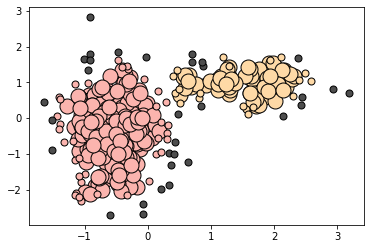

In [201]:
x1 = np.random.normal(0, 5, 300)
y1 = np.random.normal(0, 5, 300)

x2 = np.random.normal(25, 8, 100)
y2 = np.random.normal(7, 2, 100)

colors = plt.cm.Pastel2([0.33, 0.67])
plt.plot(x1, y1, 'o', color=colors[0], markersize = 9, mec = [0, 0, 0, 1], label="claster 1")
plt.plot(x2, y2, 'o', color=colors[1], markersize = 9, mec = [0, 0, 0, 1], label="claster 2")
plt.legend()
plt. show()

x = np.append(x1, x2)
y = np.append(y1, y2)

X = np.column_stack([x, y])
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.35, min_samples=10).fit(X)


labels = db.labels_
core_mask = np.zeros_like(db.labels_, dtype=bool)
core_mask[db.core_sample_indices_] = True

clusters_count = len(set(labels)) - (1 if -1 in labels else 0)
noise_cluster_count = list(labels).count(-1)
print("Amount of clusters: ", clusters_count)
print("Amount of noise points: ", noise_cluster_count)
if(len(set(labels)) > 1): 
  print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

unique_labels = set(labels)
colors = [plt.cm.Pastel1(each) for each in np.linspace(0,1, len(unique_labels))]

for colr, claster in zip(colors, unique_labels):
  if claster == -1:
    colr = [0.3, 0.3, 0.3, 1]
    next

  claster_mask = (labels == claster)

  if (claster != -1): 
    x_y = X[claster_mask & core_mask]
    plt.plot(x_y[:, 0], x_y[:, 1], 'o', color = colr, markersize = 15, mec = [0, 0, 0, 1], label="Core points")

  x_y = X[claster_mask & ~core_mask]
  plt.plot(x_y[:, 0], x_y[:, 1], 'o', color = colr, markersize = 7, mec = [0, 0, 0, 1], label = "Relative points")
#plt.legend()
plt.show()